# Text and Annotation

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
plt.style.use('seaborn-whitegrid')
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/jakevdp/data-CDCbirths/master/births.csv')

In [3]:
df.head()

,year,month,day,gender,births
0,1969,1,1.0,F,4046
1,1969,1,1.0,M,4440
2,1969,1,2.0,F,4454
3,1969,1,2.0,M,4548
4,1969,1,3.0,F,4548


In [4]:
df.describe()

,year,month,day,births
count,15547.000000,15547.000000,15067.000000,15547.000000
mean,1979.037435,6.515919,17.769894,9762.293561
std,6.728340,3.449632,15.284034,28552.465810
min,1969.000000,1.000000,1.000000,1.000000
25%,1974.000000,4.000000,8.000000,4358.000000
50%,1979.000000,7.000000,16.000000,4814.000000
75%,1984.000000,10.000000,24.000000,5289.500000
max,2008.000000,12.000000,99.000000,199622.000000


In [5]:
df.shape

(15547, 5)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15547 entries, 0 to 15546
Data columns (total 5 columns):
year      15547 non-null int64
month     15547 non-null int64
day       15067 non-null float64
gender    15547 non-null object
births    15547 non-null int64
dtypes: float64(1), int64(3), object(1)
memory usage: 607.4+ KB


## Figure out effect of holidays on US births

In [7]:
m = df[df['gender'] == 'M']
f = df[df['gender'] == 'F']

In [8]:
quartiles = np.percentile(df['births'], (25, 50, 75))
mu, sig = quartiles[1], 0.74 * (quartiles[2] - quartiles[0])
df = df.query('(births > @mu - 5 * @sig) & (births < @mu + 5 * @sig)')

In [9]:
df.day = df.day.astype(int)

In [10]:
df.head()
df.index = pd.to_datetime(df[['year', 'month', 'day']])
df.head()

,year,month,day,gender,births
1969-01-01,1969,1,1,F,4046
1969-01-01,1969,1,1,M,4440
1969-01-02,1969,1,2,F,4454
1969-01-02,1969,1,2,M,4548
1969-01-03,1969,1,3,F,4548


In [11]:
births_by_date = df.pivot_table('births', [df.index.month, df.index.day])
births_by_date.head()

births
1 1  4009.225
  2  4247.400
  3  4500.900
  4  4571.350
  5  4603.625

In [12]:
births_by_date.index = [pd.datetime(2012, month, day) for (month, day) in births_by_date.index]  # Attach an arbitrary year to the date

In [13]:
births_by_date.head()

,births
2012-01-01,4009.225
2012-01-02,4247.400
2012-01-03,4500.900
2012-01-04,4571.350
2012-01-05,4603.625


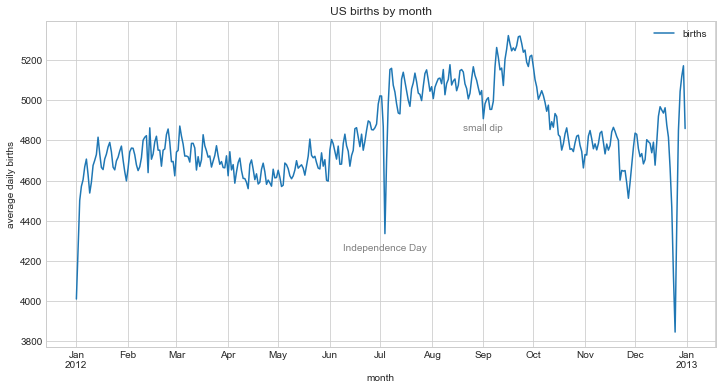

In [32]:
# Plot average daily births by date
fig, ax = plt.subplots(figsize=(12, 6))
births_by_date.plot(ax=ax);

style = dict(size=10, color='gray')

# Put text in a few places
ax.text('2012-7-4', 4250, "Independence Day", ha='center', **style);
ax.text('2012-9-1', 4850, "small dip", ha='center', **style);

# Label axes
ax.set(title='US births by month', ylabel='average daily births', xlabel='month');

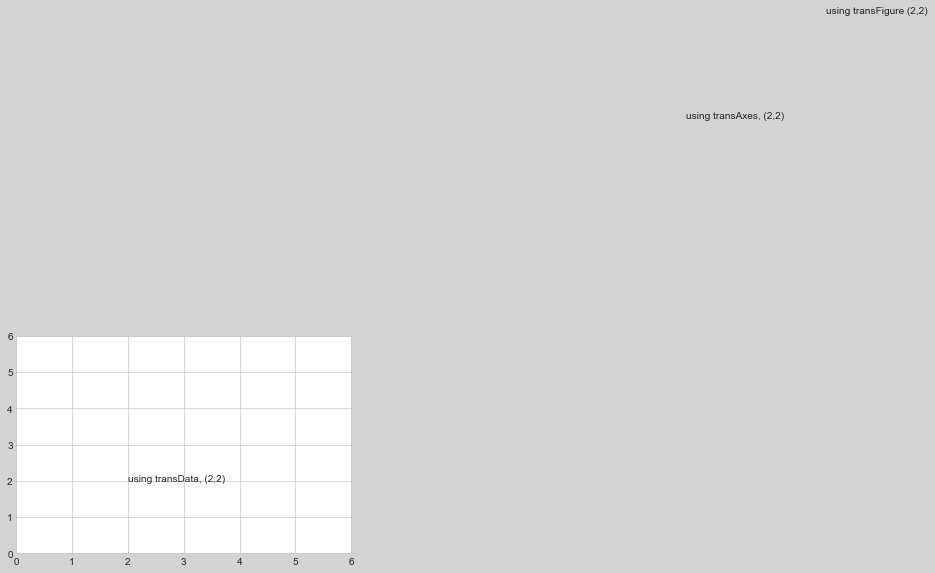

In [5]:
# Drawing text using transforms

fig, ax = plt.subplots(facecolor='lightgray', figsize=(6, 4))
ax.axis([0, 10, 0, 10])

# Experiment with coordinates using different types of transforms
ax.text(2, 2, 'using transData, (2,2)', transform=ax.transData) 
ax.text(2, 2, 'using transAxes, (2,2)', transform=ax.transAxes)
ax.text(2, 2, 'using transFigure (2,2)', transform=fig.transFigure)


# change x and ylim, only changes transData
ax.set(xlim=(0,6), ylim=(0,6));

## Arrows and Annotation

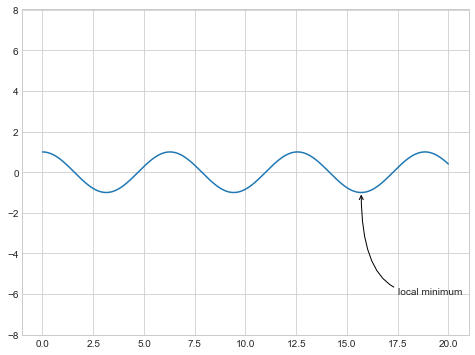

In [45]:
fix, ax = plt.subplots(figsize=(8,6))

x = np.linspace(0, 20, 1000)

ax.plot(x, np.cos(x))
ax.axis('equal')

# CRAAAZY annotations
ax.annotate('local minimum', xy=(5 * np.pi, -1), xytext=(17.5, -6),
           arrowprops=dict(arrowstyle="->", 
                          connectionstyle="angle3,angleA=10,angleB=90"));

